## Import Modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## K-Nearest Neighbor Implementation

Complete (a) the **train** ,(b) the **compute_distance** method, and (c) the **evaluate**.
The definitions of various distance metrics used in **compute_distance**, are given as below. Case using the dot product method is already implemented. Complete the remaining cases for using remaining distance metrics. Remember, vectorization is important for efficient calculation.

* Dot product distance: $d(x_i, x_j) = 1 - x_i \cdot x_j$
* Cosine distance: $d(x_i, x_j) = 1 - cos(x_i, x_j)$, where $cos()$ returns the cosine of the angle between two input vectors.
* L1 distance: $d(x_i, x_j) = \sum_{k=1}^{n} |x_{ik} - x_{jk}|$
* L2 (Euclidean) distance: $d(x_i, x_j) = \sqrt{\sum_{k=1}^{n} (x_{ik} - x_{jk})^2}$
* Chebyshev distance: $d(x_i, x_j) = \max_{k}{|x_{ik} - x_{jk}|}$

In [4]:
class KNN:
    """ k-nearest neighbor classifier class """

    def train(self, X, y):
        """
        Train the classifier using the given training data (X, y).
        Recall that for k-nearest neighbors this is just memorizing the training data.

        Question (a)

        Inputs
        - X: A numpy array of shape (N, D), where N is the number of data points,
            D is the dimensionality of each data point.
        - y: A numpy array of shape (N,) containing the training labels, where
            y[i] is the label for X[i]. With C classes, each y[i] is an integer
            from 0 to C-1.
        """
        ###########################################
        self.X_train = X
        self.y_train = y
        ########################################### 

    def inference(self, X_test, k=1, dist_metric='Dot'):
        """
        For each test example in X, this method predicts its label by majority vote
        from the k nearest training samples. It returns the predicted labels. 

        Do NOT Modify this method.

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - X_train: A numpy array of shape (M, D), where M is the number of training data points,
            D is the dimensionality of each data point.
        - k: The number of neighbors to participate in voting.
            dist_metric: Determines the distance metric to use. The default is dot-product ('dot'),
            but you will need to implement 'l2' for question (b).

        Returns
        - y_pred: A numpy array of shape (N,) containing predicted labels for the test data X,
            where y_pred[i] is the predicted label for the test point X[i].
        """
        dists = self.compute_distance(X_test, dist_metric)
        y_pred = self.predict_labels(X_test, dists, k)
        return y_pred

    def compute_distance(self, X_test, dist_metric='L2'):
        """
        Computes the distance between the training data and test data, 
        using the distance metrics written above.
        Use self.X_train to retrieve training data.

        Question (b)

        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - dist_metric: Determines the distance metric to use.

        Returns
        - dists: A numpy array of shape (N, M) where N is the number of test data points, 
            and M is the number of traininig data points, containing distances between 
            each pair of test and train data  points based on the given distance metric.
        """
        if dist_metric=='Dot': 
            dists = 1 - X_test @ self.X_train.T

        elif dist_metric=='Cos':
            ###########################################
            X_train_norm = np.linalg.norm(self.X_train.T, axis=0, keepdims=True) 
            X_test_norm = np.linalg.norm(X_test, axis=1, keepdims=True) 
            dists = 1 - ((X_test @ self.X_train.T)/X_train_norm)/X_test_norm
            ########################################### 

        elif dist_metric=='L1':
            ###########################################
            N = X_test.shape[0]
            M = self.X_train.shape[0]
            X_train_tr = np.tile(self.X_train, (N,1))
            X_test_tr = np.repeat(X_test, M, axis =0 )
            dist_temp = np.sum(np.abs(X_train_tr-X_test_tr), axis=1)
            dists = dist_temp.reshape(N, M)

            ########################################### 

        elif dist_metric=='L2':          
            ###########################################
            N = X_test.shape[0]
            M = self.X_train.shape[0]
            X_train_tr = np.tile(self.X_train, (N,1))
            X_test_tr = np.repeat(X_test, M, axis =0 )
            dist_temp = np.sqrt(np.sum((X_train_tr-X_test_tr)**2, axis=1))
            dists = dist_temp.reshape(N, M)#  https://yganalyst.github.io/ml/ML_kNN_numpy/ 참고
            ###########################################

        elif dist_metric=='Chebyshev':          
            ###########################################
            
            N = X_test.shape[0]
            M = self.X_train.shape[0]
            X_train_tr = np.tile(self.X_train, (N,1))
            X_test_tr = np.repeat(X_test, M, axis =0 )
            dist_temp = np.max((X_train_tr-X_test_tr), axis=1)
            dists = dist_temp.reshape(N, M)                                         
            ########################################### 
        return dists

    def predict_labels(self, X_test, dists, k):
        """
        For the given test image, this method takes a majority vote from k closest points
        to predict the class of the test image.

        Question (c)
        
        Inputs
        - X_test: A numpy array of shape (N, D), where N is the number of test data points,
            D is the dimensionality of each data point.
        - dists: A numpy array of shape (N, M) where N is the number of test data points, 
            and M is the number of traininig data points, containing distances between 
            each pair of test and train data points based on the given distance metric.
        - k: The number of neighbors to participate in voting.

        Returns
        - y_pred: A numpy array of shape (N,) containing predicted labels for the test data X,
            where y_pred[i] is the predicted label for the test point X[i].
        """
        ###########################################
        N = X_test.shape[0]
        y_pred = np.zeros(N) 
        dist_sort_idx = dists.argsort()
        for i in range(N):
          nearest = self.y_train[dist_sort_idx[i][:k]]
          label, cnt = np.unique(nearest, return_counts=True)
          y_pred[i] = label[np.argmax(cnt)] 
          #https://yganalyst.github.io/ml/ML_kNN_numpy/  참고


        ########################################### 
        return y_pred

    def evaluate(self, y, y_hat):
        """
        Compares the predicted labels to the ground truth y, and prints the
        classification accuracy.
        
        Do NOT Modify this method.

        Inputs
        - y: A numpy array of shape (N,) containing the ground truth labels, where
            N is the number of test examples. With C classes, each y[i] is an integer
            from 0 to C-1.
        - y_hat: A numpy array of shape (N,) containing the predicted labels, where
            N is the number of test examples. With C classes, each y_pred[i] is
            an integer from 0 to C-1.
            
        Returns:
        - accuracy
        """
        y_hat = np.expand_dims(y_hat, axis=1)
        num_correct = np.sum(y_hat == y)
        accuracy = float(num_correct) / y.shape[0]
        return accuracy

## Data Loading (MNIST)

In [5]:
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms

class DatasetMNIST(Dataset):
    """ Dataset for the MNIST dataset """

    def __init__(self, file_path, transform=None):
      """
      Do NOT modify this function.
      """
      self.data = pd.read_csv(file_path)
      self.transform = transform
    
    def __len__(self):
      """
      Do NOT modify this function.
      """
      return len(self.data)

    def __getitem__(self, index):
      """
      Define __getitem__ method of the DatasetMNIST class. 
      Carefully consider the structure of the CSV file and define the image and label.
      The image needs to be reshaped and transformed.
      Question (d)

      Input :
      - index

      Returns :
      - image 
      - label 
      """ 

      ###########################################
      
    
      label = self.data.iloc[index,0]
      image_tmp1 = self.data.iloc[index, 1:]
      image_tmp2 = image_tmp1.to_numpy().reshape(28,28)
      
      if self.transform != None:
        image = self.transform(image_tmp2.reshape(28,28))
      
      ###########################################
      
      return image, label 

class Data:
    """DataLoader and print_example for the MNIST dataset """

    def __init__(self):
      pass
    
    def load_data(self, train_data, test_data):
        """
        Create DataLoaders that iterate over the train_data and the test_data.
        Each iteration of the dataloaders should return a batch of the data.
        Set the batch size to 1000 for the train_data and 200 for the test_data.
        Make sure that the data is shuffled after iterating over all batches.
        Use DataLoader class in pytorch.

        Question (d)

        Input :
        - train_data
        - test_data

        Returns :
        - train_loader 
        - test_loader 
        """ 
        
        ###########################################

        train_loader = DataLoader(dataset=train_data, batch_size=1000, shuffle=True)
        test_loader = DataLoader(dataset=test_data, batch_size=200, shuffle=True)

        ###########################################

        return train_loader, test_loader

    def print_example(self, test_loader):
        """
        Do NOT modify this function.

        Check out a sample of the test data and print out 6 images in a rectangular form (height*width = 2*3).
        
        iterate one batch from the test_loader and print out the batch's shape. 
  
        Input :
        - test_loader 
        """ 

        examples = enumerate(test_loader)
        batch_idx, (images, one_batch_labels) = next(examples)

        print("one batch's shape: ", images.shape)

        fig = plt.figure()
        for i in range(6):
          plt.subplot(2, 3, i + 1)
          plt.imshow(images[i][0], cmap='gray')
          plt.title("Ground Truth: {}".format(one_batch_labels[i]))
          plt.xticks([])
          plt.yticks([])
    
        print(fig)

image shape at the first row : torch.Size([1, 28, 28])
one batch's shape:  torch.Size([200, 1, 28, 28])
Figure(640x480)


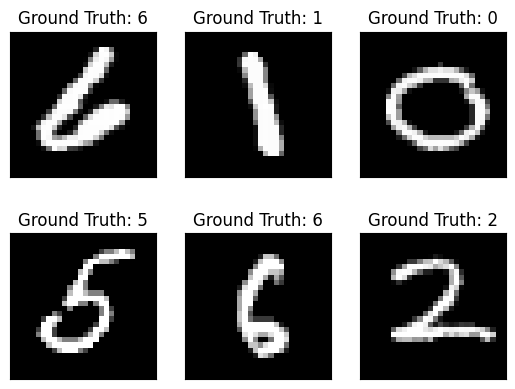

In [6]:
train_file_path = '/content/sample_data/mnist_train_small.csv'
train_data = DatasetMNIST(file_path = train_file_path, transform = torchvision.transforms.ToTensor())

test_file_path = '/content/sample_data/mnist_test.csv'
test_data = DatasetMNIST(file_path = test_file_path, transform = torchvision.transforms.ToTensor())

img, label = test_data.__getitem__(0)
print(('image shape at the first row : {}'.format(img.size())))

data = Data()
train_loader, test_loader = data.load_data(train_data, test_data)
data.print_example(test_loader)

In [7]:
num_train_data = 1000
num_test_data = 200

X_train, y_train = next(iter(train_loader))
X_train = X_train.reshape(num_train_data, -1).numpy()
y_train = y_train.unsqueeze(1).numpy()

X_test, y_test = next(iter(test_loader))
X_test = X_test.reshape(num_test_data, -1).numpy()
y_test = y_test.unsqueeze(1).numpy()

print('Sampling Training & Test Data.....\n')
print('Training data shape: {}'.format(X_train.shape))
print('Training labels shape: {}'.format(y_train.shape))
print('Test data shape: {}'.format(X_test.shape))
print('Test labels shape: {}'.format(y_test.shape))

Sampling Training & Test Data.....

Training data shape: (1000, 784)
Training labels shape: (1000, 1)
Test data shape: (200, 784)
Test labels shape: (200, 1)


## Model Training & Evaluation

In [8]:
model = KNN()
model.train(X_train, y_train)

In [9]:
"""
Model usage for test.
"""
K = 15
y_pred = model.inference(X_test, k=K, dist_metric='Cos')
acc = model.evaluate(y_test, y_pred)
print("Accuarcy:", acc)

Accuarcy: 0.87


## Experiments

In [12]:
# Modify the number of k's and metrics to try as you want
num_ks = 30
metrics = ['Dot', 'Cos', 'L1', 'L2', 'Chebyshev']

In [13]:
# Run experiments
print_k_interval = 5
result = dict(zip(metrics, [[] for _ in range(len(metrics))]))
for metric in metrics:
    print("running KNN with {} distance metric".format(metric))
    for k in range(1, num_ks+1):
        if k % print_k_interval==0:
            print("    processing... k={:3d}".format(k))
        y_pred = model.inference(X_test, k=k, dist_metric=metric)
        acc = model.evaluate(y_test, y_pred)
        result[metric].append(acc)
    print()

running KNN with Dot distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30

running KNN with Cos distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30

running KNN with L1 distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30

running KNN with L2 distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30

running KNN with Chebyshev distance metric
    processing... k=  5
    processing... k= 10
    processing... k= 15
    processing... k= 20
    processing... k= 25
    processing... k= 30



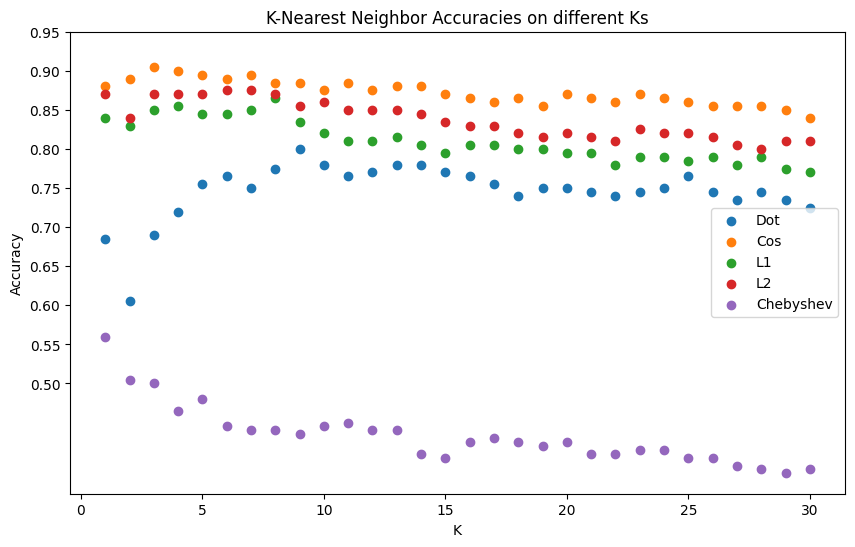

In [14]:
#Visualize the result
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)

x_axis = np.arange(1, num_ks+1, 1)
for i, metric in enumerate(metrics):
    ax.scatter(x_axis, result[metric], label = metric)

ax.set(title="K-Nearest Neighbor Accuracies on different Ks")
ax.set(xlabel='K', ylabel='Accuracy')
ax.set(xticks=np.arange(0, num_ks+1,5), yticks=np.arange(0.5,1.0,0.05))
ax.legend()
plt.show()

**Question (e)**: Interpret the result from the above graph. What distance metric would you use for MNIST classification, and why? Can you discuss why that distance is appropriate for MNIST classification?



Your answer: 

Cos을 사용하였을때 일관적으로 가장 높은 성능을 보임. 그리고 k값을 5씩 증가시켜 test트 해보았을때 결과를 살펴보면, k값이 증가하면서 정확도가 증가하다가 overfitting되면서 감소하는 경향을 보임. 글자마다 생긴 모양이 비슷하므로 코사인 거리 계산이나 norm을 활용한 metric이 높은 성능을 보이는 것으로 해석할 수 있음.